## Data Wrangling

In [2]:
import pandas as pd

df = pd.read_csv("./data/covid_data.csv")
df.head(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
7,2,1,1,1,9999-99-99,97,1,64,2,1,...,2,1,1,2,2,2,1,2,3,97
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,3,2


### Drop columns with high rates of missing information

In [3]:
df.drop(columns=['CLASIFFICATION_FINAL', 'PATIENT_TYPE', 'PREGNANT', 'INTUBED', 'ICU', 'MEDICAL_UNIT', 'USMER'], inplace=True)

### Drop rows that have missing values

In [4]:
df = df[~(df == 99).any(axis=1)]
df = df[~(df == 98).any(axis=1)]
df = df[~(df == 97).any(axis=1)]
df.shape[0]

1024829

### Convert binary columns values to 0 and 1

In [5]:
df['SEX'] = df['SEX'].replace({1: 0, 2: 1})
df['PNEUMONIA'] = df['PNEUMONIA'].replace({1: 0, 2: 1})
df['DIABETES'] = df['DIABETES'].replace({1: 0, 2: 1})
df['COPD'] = df['COPD'].replace({1: 0, 2: 1})
df['ASTHMA'] = df['ASTHMA'].replace({1: 0, 2: 1})
df['INMSUPR'] = df['INMSUPR'].replace({1: 0, 2: 1})
df['HIPERTENSION'] = df['HIPERTENSION'].replace({1: 0, 2: 1})
df['OTHER_DISEASE'] = df['OTHER_DISEASE'].replace({1: 0, 2: 1})
df['CARDIOVASCULAR'] = df['CARDIOVASCULAR'].replace({1: 0, 2: 1})
df['OBESITY'] = df['OBESITY'].replace({1: 0, 2: 1})
df['TOBACCO'] = df['TOBACCO'].replace({1: 0, 2: 1})
df['RENAL_CHRONIC'] = df['RENAL_CHRONIC'].replace({1: 0, 2: 1})

### Convert death date column to column representing whether the patient died or not

In [6]:
def convert_death(x):
    if x == "9999-99-99":
        return 0
    else: 
        return 1
    
df['DATE_DIED'] = df['DATE_DIED'].apply(convert_death)
df = df.rename(columns={'DATE_DIED': 'DIED'})

### Standardize the Age column

In [7]:
df['AGE'] = (df['AGE'] - df['AGE'].min()) / (df['AGE'].max() - df['AGE'].min())
df['AGE']

0          0.537190
1          0.595041
2          0.454545
3          0.438017
4          0.561983
             ...   
1048570    0.330579
1048571    0.421488
1048572    0.454545
1048573    0.231405
1048574    0.429752
Name: AGE, Length: 1024829, dtype: float64

In [61]:
df.head(20)  

,SEX,DIED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO
0,0,1,0,0.537190,1,1,1,1,0,1,1,1,1,1
1,1,1,0,0.595041,1,1,1,1,0,1,1,0,0,1
2,1,1,1,0.454545,0,1,1,1,1,1,1,1,1,1
3,0,1,1,0.438017,1,1,1,1,1,1,1,1,1,1
4,1,1,1,0.561983,0,1,1,1,0,1,1,1,1,1
5,0,0,0,0.330579,1,1,1,1,1,1,1,1,1,1
6,0,0,1,0.528926,1,1,1,1,1,1,1,1,1,1
7,0,0,0,0.528926,0,1,1,0,0,1,1,1,0,1
8,0,0,1,0.305785,0,1,1,1,0,1,1,0,1,1
9,0,0,1,0.206612,1,1,1,1,1,1,1,1,1,1


### Reorganize the column order

In [8]:
df = df[['AGE', 'SEX', 'PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA',
       'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'DIED']]

In [70]:
df.head(10)

,AGE,SEX,PNEUMONIA,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,DIED
0,0.537190,0,0,1,1,1,1,0,1,1,1,1,1,1
1,0.595041,1,0,1,1,1,1,0,1,1,0,0,1,1
2,0.454545,1,1,0,1,1,1,1,1,1,1,1,1,1
3,0.438017,0,1,1,1,1,1,1,1,1,1,1,1,1
4,0.561983,1,1,0,1,1,1,0,1,1,1,1,1,1
5,0.330579,0,0,1,1,1,1,1,1,1,1,1,1,0
6,0.528926,0,1,1,1,1,1,1,1,1,1,1,1,0
7,0.528926,0,0,0,1,1,0,0,1,1,1,0,1,0
8,0.305785,0,1,0,1,1,1,0,1,1,0,1,1,0
9,0.206612,0,1,1,1,1,1,1,1,1,1,1,1,0


In [65]:
df.to_csv('./data/covid_data_cleaned.csv', index=False)

## Class Imbalance Analysis

Let's analyze the distribution of the target variable (DIED) to understand class imbalance and determine appropriate evaluation metrics.

In [9]:
# Calculate class distribution
class_counts = df['DIED'].value_counts()
class_percentages = df['DIED'].value_counts(normalize=True) * 100

print("Class Distribution:")
print("==================")
print(f"Survived (0): {class_counts[0]:,} samples ({class_percentages[0]:.2f}%)")
print(f"Died (1): {class_counts[1]:,} samples ({class_percentages[1]:.2f}%)")
print(f"\nTotal samples: {len(df):,}")

# Calculate imbalance ratio
imbalance_ratio = class_counts[0] / class_counts[1]
print(f"\nImbalance ratio (majority/minority): {imbalance_ratio:.2f}:1")

Class Distribution:
Survived (0): 950,217 samples (92.72%)
Died (1): 74,612 samples (7.28%)

Total samples: 1,024,829

Imbalance ratio (majority/minority): 12.74:1


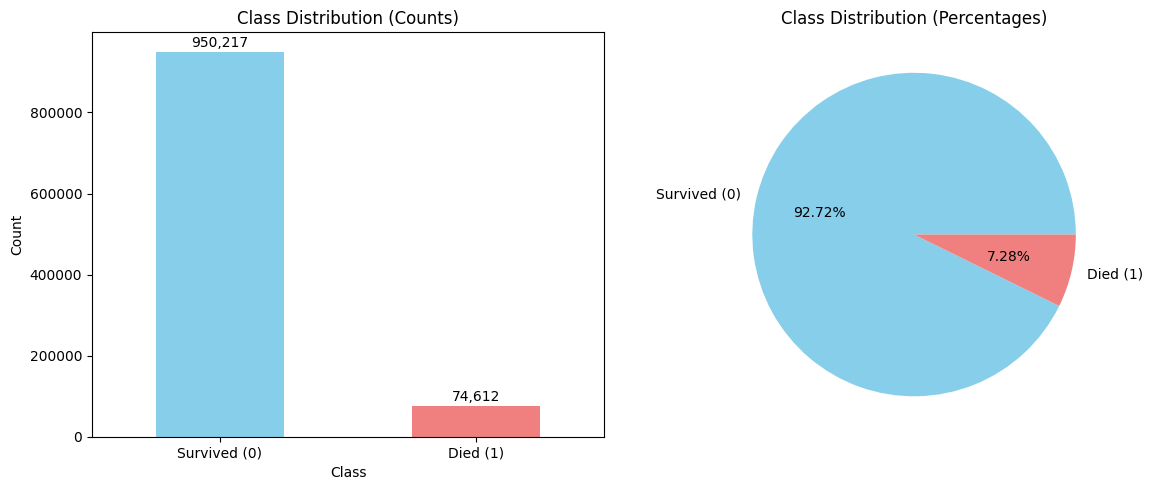

In [10]:
# Visualize class distribution
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot
class_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
ax1.set_title('Class Distribution (Counts)')
ax1.set_xlabel('Class')
ax1.set_ylabel('Count')
ax1.set_xticklabels(['Survived (0)', 'Died (1)'], rotation=0)
ax1.tick_params(axis='x', rotation=0)

# Add count labels on bars
for i, v in enumerate(class_counts.values):
    ax1.text(i, v + 5000, f'{v:,}', ha='center', va='bottom')

# Pie chart
ax2.pie(class_counts.values, labels=['Survived (0)', 'Died (1)'], 
        autopct='%1.2f%%', colors=['skyblue', 'lightcoral'])
ax2.set_title('Class Distribution (Percentages)')

plt.tight_layout()
plt.show()

### Class Imbalance Analysis Results

**Key Findings:**
- **Severe Class Imbalance**: 92.72% survived vs 7.28% died
- **Imbalance Ratio**: 12.74:1 (majority to minority class)
- **Dataset Size**: 1,024,829 total samples

### Recommended Evaluation Metrics

Given this significant class imbalance, **accuracy alone will be misleading** (a model predicting all patients survive would achieve 92.72% accuracy). Instead, use these metrics:

#### Primary Metrics:
1. **Precision**: Of predicted deaths, how many actually died? (Reduces false alarms)
2. **Recall (Sensitivity)**: Of actual deaths, how many were correctly predicted? (Critical for healthcare)
3. **F1-Score**: Harmonic mean of precision and recall
4. **AUC-ROC**: Area under ROC curve (threshold-independent)
5. **AUC-PR**: Area under Precision-Recall curve (better for imbalanced data)

#### Secondary Metrics:
- **Specificity**: Of actual survivors, how many were correctly predicted?
- **Balanced Accuracy**: Average of sensitivity and specificity
- **Matthews Correlation Coefficient (MCC)**: Correlation between predicted and actual classes

#### Healthcare Context:
- **High Recall** is crucial to avoid missing patients at risk of death
- **Moderate Precision** is acceptable to catch more potential deaths
- Consider **cost-sensitive learning** where misclassifying a death is more costly

### Why Recall Over Precision?

**The Cost of Mistakes:**

| Metric | What it measures | False Positive (FP) | False Negative (FN) |
|--------|------------------|---------------------|---------------------|
| **Precision** | Of predicted deaths, how many actually died? | Predict death, patient survives | - |
| **Recall** | Of actual deaths, how many were predicted? | - | Predict survival, patient dies |

**In Healthcare Context:**

**False Positive (Low Precision):**
- Model predicts patient will die, but they survive
- **Consequence**: Extra monitoring, tests, or treatments
- **Cost**: Medical resources, patient anxiety
- **Outcome**: Patient still receives care and survives ✅

**False Negative (Low Recall):**
- Model predicts patient will survive, but they die
- **Consequence**: No additional intervention, missed opportunity
- **Cost**: Patient's life
- **Outcome**: Preventable death ❌

**The Trade-off:**
- **High Recall, Lower Precision**: We catch most at-risk patients (good) but flag some who don't need intervention (acceptable)
- **High Precision, Lower Recall**: We're very sure about our death predictions (good) but miss many patients who actually die (unacceptable)

**Bottom Line:** In life-or-death situations, it's better to be overly cautious than to miss someone who needs help.

## Feature Engineering & Data Processing Summary

### Data Imputation Strategy:
**Exclusion-based Imputation** (Domain-specific approach for medical data):
- **Removed entire rows** with missing values coded as 97, 98, or 99 (Mexican health system missing data codes)
- **Rationale**: In healthcare datasets, missing critical medical information often indicates incomplete records that could bias predictions
- **Impact**: Reduced dataset from 1M+ to 1,024,829 complete records (maintained data quality over quantity)

### Feature Engineering Process:

#### 1. **Binary Feature Standardization** (12 medical condition features):
- **Original encoding**: 1 = "No condition", 2 = "Has condition" 
- **Engineered to**: 0 = "No condition", 1 = "Has condition"
- **Features transformed**: SEX, PNEUMONIA, DIABETES, COPD, ASTHMA, INMSUPR, HIPERTENSION, OTHER_DISEASE, CARDIOVASCULAR, OBESITY, TOBACCO, RENAL_CHRONIC
- **Purpose**: Consistent binary encoding for neural network compatibility

#### 2. **Target Variable Engineering**:
- **Original**: DATE_DIED column with date strings or "9999-99-99" (alive indicator)
- **Engineered**: Binary DIED column (0 = survived, 1 = died)
- **Method**: Custom function to parse date strings vs. placeholder values

#### 3. **Numerical Feature Normalization**:
- **AGE column**: Applied Min-Max scaling → values between 0 and 1
- **Formula**: (age - min_age) / (max_age - min_age)
- **Purpose**: Prevent age values from dominating neural network training

#### 4. **Feature Selection & Organization**:
- **Removed**: 7 columns with high missing rates (CLASIFFICATION_FINAL, PATIENT_TYPE, PREGNANT, INTUBED, ICU, MEDICAL_UNIT, USMER)
- **Final feature set**: 13 predictors + 1 target variable
- **Order**: Structured with continuous (AGE) first, then categorical features, target last

## Resume Bullet Points

**Covid Classifier** | GitHub | Python, PyTorch, pandas, NumPy, Matplotlib, Anaconda, CUDA, Git

• Processed 1M+ COVID patient records using row deletion for missing data imputation and engineered 13 predictive features with binary label encoding of 12 medical conditions (1→0, 2→1), target variable transformation from date strings to binary mortality indicator, and Min-Max normalization of age data

• Designed 4-layer PyTorch neural network with ReLU activations, Adam optimizer, and binary cross-entropy loss achieving 80% recall for mortality prediction, prioritizing sensitivity over accuracy to minimize false negatives in life-critical healthcare predictions